# Model selection, XGBoost data set 1

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
dataset = pd.read_csv('germany_housing_data_part1_with_unwanted_columns_removed.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
dataset.head()

,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,Condition,Heating,Energy_source,State,Garagetype,Type,Price
0,106.00,229.0,5.5,3.0,1.0,2.0,2005.0,NaN,2.0,modernized,central heating,gas,Baden-Württemberg,Parking lot,Multiple dwelling,498000.0
1,140.93,517.0,6.0,3.0,2.0,NaN,1994.0,NaN,7.0,modernized,stove heating,NaN,Baden-Württemberg,Parking lot,Mid-terrace house,495000.0
2,162.89,82.0,5.0,3.0,2.0,4.0,2013.0,NaN,1.0,dilapidated,stove heating,other combinations of energy sources,Baden-Württemberg,Garage,Farmhouse,749000.0
3,140.00,814.0,4.0,NaN,2.0,2.0,1900.0,2000.0,1.0,fixer-upper,central heating,electricity,Baden-Württemberg,Garage,Farmhouse,259000.0
4,115.00,244.0,4.5,2.0,1.0,NaN,1968.0,2019.0,1.0,refurbished,central heating,oil,Baden-Württemberg,Garage,Multiple dwelling,469000.0


## Encoding categorical data

We can see below, that the column numbers 9 - 14 have categorical data and must be one hot encoded

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10552 entries, 0 to 10551
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Living_space    10552 non-null  float64
 1   Lot             10552 non-null  float64
 2   Rooms           10552 non-null  float64
 3   Bedrooms        6878 non-null   float64
 4   Bathrooms       8751 non-null   float64
 5   Floors          7888 non-null   float64
 6   Year_built      9858 non-null   float64
 7   Year_renovated  5349 non-null   float64
 8   Garages         8592 non-null   float64
 9   Condition       10229 non-null  object 
 10  Heating         9968 non-null   object 
 11  Energy_source   9325 non-null   object 
 12  State           10551 non-null  object 
 13  Garagetype      8592 non-null   object 
 14  Type            10150 non-null  object 
 15  Price           10552 non-null  float64
dtypes: float64(10), object(6)
memory usage: 1.3+ MB


### The onehot encoding of the columns

In [4]:
X = pd.get_dummies(X)
X.head(10)

,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,Condition_as new,...,Type_Castle,Type_Corner house,Type_Duplex,Type_Farmhouse,Type_Mid-terrace house,Type_Multiple dwelling,Type_Residential property,Type_Single dwelling,Type_Special property,Type_Villa
0,106.00,229.0,5.5,3.0,1.0,2.0,2005.0,NaN,2.0,0,...,0,0,0,0,0,1,0,0,0,0
1,140.93,517.0,6.0,3.0,2.0,NaN,1994.0,NaN,7.0,0,...,0,0,0,0,1,0,0,0,0,0
2,162.89,82.0,5.0,3.0,2.0,4.0,2013.0,NaN,1.0,0,...,0,0,0,1,0,0,0,0,0,0
3,140.00,814.0,4.0,NaN,2.0,2.0,1900.0,2000.0,1.0,0,...,0,0,0,1,0,0,0,0,0,0
4,115.00,244.0,4.5,2.0,1.0,NaN,1968.0,2019.0,1.0,0,...,0,0,0,0,0,1,0,0,0,0
5,310.00,860.0,8.0,NaN,NaN,3.0,1969.0,NaN,2.0,0,...,0,0,0,0,1,0,0,0,0,0
6,502.00,5300.0,13.0,NaN,4.0,NaN,2004.0,NaN,7.0,0,...,0,0,1,0,0,0,0,0,0,0
7,263.00,406.0,10.0,NaN,NaN,3.0,1989.0,NaN,2.0,0,...,0,0,1,0,0,0,0,0,0,0
8,227.00,973.0,10.0,4.0,4.0,2.0,1809.0,2015.0,8.0,0,...,0,0,1,0,0,0,0,0,0,0
9,787.00,933.0,30.0,NaN,NaN,3.0,1920.0,NaN,12.0,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
X = X.values
y = y.values

### The result of each model will be added to this list

In [6]:
results_r2 = []

# Model: XGBoost regression

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the XGBoost regression model 

In [8]:
from xgboost import XGBRegressor
#seed = 0 is default
regressor = XGBRegressor(seed = 0)
regressor.fit(X_train, y_train)

[11:11:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(seed=0)

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[724218.94 630000.  ]
 [449768.41 360000.  ]
 [281642.19 209000.  ]
 ...
 [504061.81 479000.  ]
 [189565.17 315000.  ]
 [777850.62 285000.  ]]


## Evaluating the Model Performance

In [10]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))


0.5311407037817611


## Evaluating the Model Performance

In [11]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.5311407037817611


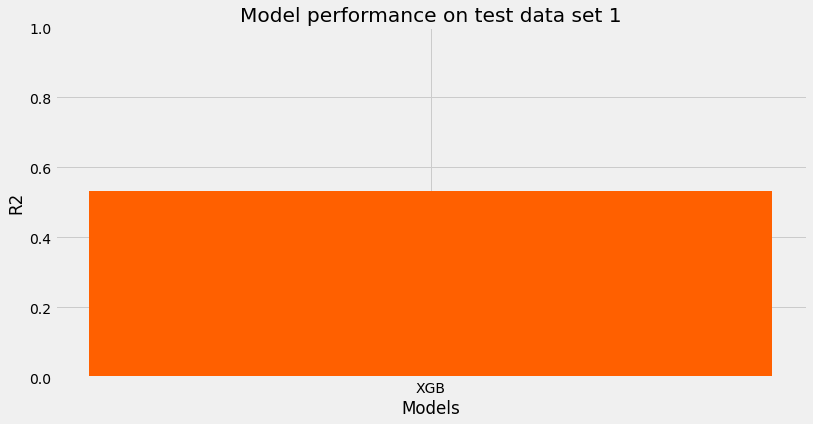

In [12]:
import matplotlib.cm as cm
from numpy.random import rand

# get a color map
cmap = cm.get_cmap('jet')
# 5 nbrs 0 - 1 in array
my_colors = rand(5)

plt.style.use('fivethirtyeight')
plt.figure(figsize =(12,6))

models = np.array(["XGB"])

plt.bar(models, results_r2, color = cmap(my_colors))
plt.xlabel("Models")
plt.ylabel("R2")
plt.title("Model performance on test data set 1")
plt.ylim(0.0, 1)
plt.show()